In [1]:
# Function to solve the 0/1 Knapsack problem using divide and conquer approach
function knapsack_dq(W, weights, values, n)
    # Base case: no items left or no capacity left
    if n == 0 || W == 0
        return 0, []
    end

    # If the weight of the nth item is more than the knapsack capacity W,
    # then this item cannot be included in the optimal solution
    if weights[n] > W
        return knapsack_dq(W, weights, values, n - 1)
    else
        # Solve the subproblem including the nth item
        value_including_n, items_including_n = knapsack_dq(W - weights[n], weights, values, n - 1)
        value_including_n += values[n]

        # Solve the subproblem excluding the nth item
        value_excluding_n, items_excluding_n = knapsack_dq(W, weights, values, n - 1)

        # Compare the two cases and return the better result
        if value_including_n > value_excluding_n
            return value_including_n, [n; items_including_n]
        else
            return value_excluding_n, items_excluding_n
        end
    end
end

knapsack_dq (generic function with 1 method)

In [2]:
# Function to solve the 0/1 Knapsack problem using dynamic programming approach
function knapsack_dp(W, weights, values)
    n = length(weights)
    
    # Create a 2D array to store the maximum value at each n, W 
    ###(n=number of items, W=maximum weight in the knapsack)
    dp = zeros(Int, n + 1, W + 1)

    # Build the dp array bottom-up
    for i in 1:n
        for w in 0:W
            if weights[i] <= w
                dp[i + 1, w + 1] = max(dp[i, w + 1], values[i] + dp[i, w - weights[i] + 1])
            else
                dp[i + 1, w + 1] = dp[i, w + 1]
            end
        end
    end

    # The maximum value is found at dp[n+1, W+1]
    max_value = dp[n + 1, W + 1]

    # Backtrack to find the items included in the optimal solution
    selected_items = []
    w = W
    for i in n:-1:1
        if dp[i + 1, w + 1] != dp[i, w + 1]
            push!(selected_items, i)
            w -= weights[i]
        end
    end

    return max_value, reverse(selected_items)
end

knapsack_dp (generic function with 1 method)

In [42]:
# Example usage of the divide & conquer function
using Random
Random.seed!(100)
weights =rand(1:10, 30) * 10 
values = rand(1:10, 30) * 1
W = 300
n = length(weights)

@time max_value, selected_items = knapsack_dq(W, weights, values, n)
println("\nweights:", weights)
println("Values:", values)
println("\nMaximum value in Knapsack: ", max_value)
println("Selected items: ", reverse(selected_items))

  0.098957 seconds (1.74 M allocations: 92.223 MiB, 9.20% gc time)

weights:[20, 20, 60, 100, 10, 30, 90, 90, 60, 10, 80, 60, 40, 40, 30, 60, 90, 20, 70, 40, 80, 30, 70, 20, 60, 80, 20, 90, 70, 50]
Values:[70, 50, 60, 20, 30, 30, 40, 40, 30, 100, 70, 100, 30, 30, 90, 40, 20, 60, 20, 40, 70, 20, 70, 10, 60, 60, 20, 90, 20, 90]

Maximum value in Knapsack: 670
Selected items: Any[1, 2, 3, 5, 10, 12, 15, 18, 27, 30]


In [44]:
# Example usage of the dynamic programming function
using Random
Random.seed!(100)
weights =rand(1:10, 30) * 10
values = rand(1:10, 30) * 1
W = 300

@time max_value, selected_items = knapsack_dp(W, weights, values)
println("\nweights:", weights)
println("Values:", values)
println("\nMaximum value in Knapsack: ", max_value)
println("Selected items: ", selected_items)

  0.000049 seconds (11 allocations: 73.719 KiB)

weights:[20, 20, 60, 100, 10, 30, 90, 90, 60, 10, 80, 60, 40, 40, 30, 60, 90, 20, 70, 40, 80, 30, 70, 20, 60, 80, 20, 90, 70, 50]
Values:[7, 5, 6, 2, 3, 3, 4, 4, 3, 10, 7, 10, 3, 3, 9, 4, 2, 6, 2, 4, 7, 2, 7, 1, 6, 6, 2, 9, 2, 9]

Maximum value in Knapsack: 67
Selected items: Any[1, 2, 3, 5, 10, 12, 15, 18, 27, 30]


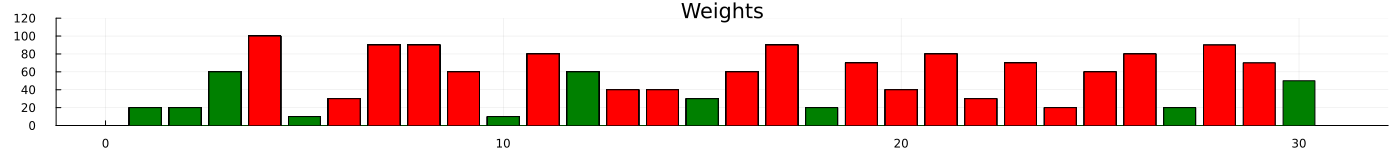

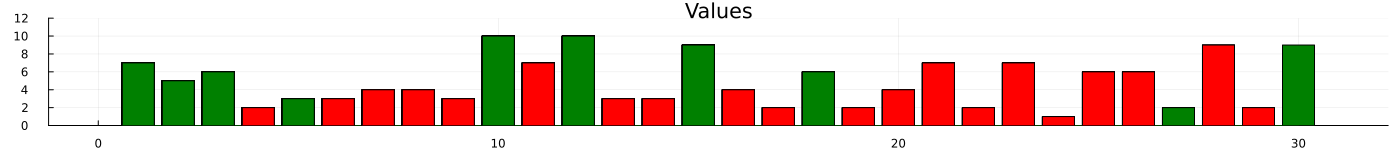

In [45]:
### visuially showing the results  
using Plots

# Function to determine the color
get_color(index) = index in selected_items ? :green : :red

# Initialize the plots with empty data
p_weights = plot(1:length(weights), fill(0, length(weights)), 
                 title="Weights", xlabel="Items", ylabel="Weight", 
                 legend=false, ylim=(0, maximum(weights)*1.2), color=:green, size=(1400,150))

p_values = plot(1:length(values), fill(0, length(values)), 
                title="Values", xlabel="Items", ylabel="Value", 
                legend=false, ylim=(0, maximum(values)*1.2), color=:green, size=(1400,150))


for i in 1:length(weights)
    # Update weights plot
    bar!(p_weights, 1:i, weights[1:i], 
         color=[get_color(j) for j in 1:i])
    
    # Update values plot
    bar!(p_values, 1:i, values[1:i], 
         color=[get_color(j) for j in 1:i])
    
end
display(p_weights)
display(p_values)
